In [1]:
import sys
import numpy as np
import pandas as pd
import seaborn as sns
import scipy as sp
from download import download

np.set_printoptions(suppress=True)

In [2]:
ticker = input("Ticker: ")
apikey = open("apikey", "r").readline()
#download(ticker, apikey)

Ticker: SPY


In [3]:
dat = pd.read_csv("./data/{}.csv" .format(ticker))
dat = dat.loc[::-1].reset_index().drop(columns=["index"])
print(dat)

            date       open       high         low     close    adjClose  \
0     2000-01-03  148.25000  148.25000  143.875000  145.4375   94.946426   
1     2000-01-04  143.53125  144.06250  139.640625  139.7500   91.233467   
2     2000-01-05  139.93750  141.53125  137.250000  140.0000   91.396667   
3     2000-01-06  139.62500  141.50000  137.750000  137.7500   89.927795   
4     2000-01-07  140.31250  145.75000  140.062500  145.7500   95.150459   
...          ...        ...        ...         ...       ...         ...   
5890  2023-06-01  418.09000  422.92000  416.790000  421.8200  421.820007   
5891  2023-06-02  424.50000  428.74000  423.950000  427.9200  427.920013   
5892  2023-06-05  428.28000  429.67000  426.370000  427.1000  427.100006   
5893  2023-06-06  426.67000  428.57720  425.990000  428.0300  428.029999   
5894  2023-06-07  428.44000  429.62000  426.110000  426.5500  426.549988   

        volume  unadjustedVolume   change  changePercent    vwap  \
0      8164300     

In [4]:
returns = []
for t in range(1, dat.shape[0]):
    returns.append((dat["adjClose"][t] - dat["adjClose"][t-1]) * 100 / dat["adjClose"][t-1])
returns = np.array(returns)
returns = np.sort(returns)

print("{} P&L Statistics (%)" .format(ticker))
print(pd.DataFrame(returns).describe())

SPY P&L Statistics (%)
                 0
count  5894.000000
mean      0.033261
std       1.245969
min     -10.942372
25%      -0.480817
50%       0.065034
75%       0.601524
max      14.519767


[Text(0.5, 0, 'SPY P&L (%)'), Text(0, 0.5, 'Frequency')]

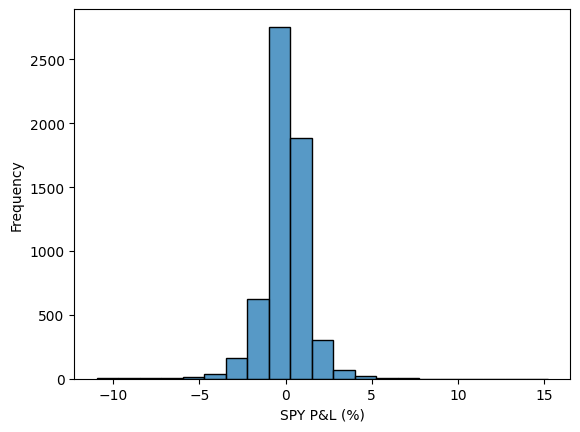

In [5]:
ax = sns.histplot(data=returns, binwidth=np.std(returns))
ax.set(xlabel="{} P&L (%)" .format(ticker), ylabel="Frequency")

[Text(0.5, 0, 'SPY P&L (%)'), Text(0, 0.5, 'kde')]

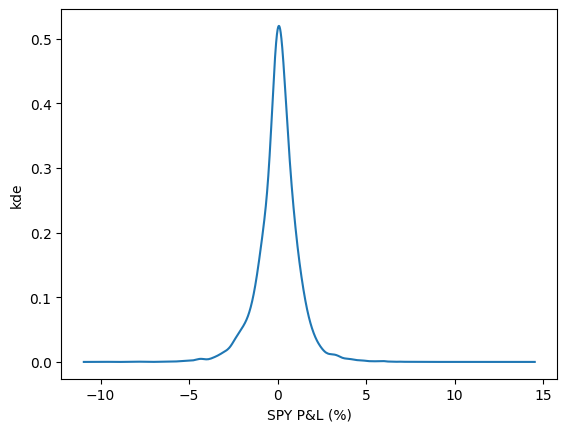

In [6]:
kde = sp.stats.gaussian_kde(returns)
df = pd.DataFrame({"returns": returns, "kde": kde(returns)})
ax = sns.lineplot(data=df, x="returns", y="kde")
ax.set(xlabel="{} P&L (%)" .format(ticker), ylabel="kde")

In [7]:
epoch = 10
sample_size = 5
sample_path = []
sample_path_prob = []

for t in range(epoch):
    path = kde.resample(sample_size)[0]

    p = 1.00
    for val in path:
        p *= kde.pdf(val)
    
    path[0] = dat["adjClose"].iloc[-1] * (1.00 + path[0] / 100)
    for i in range(1, sample_size):
        path[i] = path[i-1] * (1.00 + path[i] / 100)
    
    print(p, path)
    

[0.00313201] [427.13501954 430.83184118 424.92863351 425.66695682 425.00567853]
[0.00047218] [428.14123524 435.06490849 435.65189526 428.15718877 430.73553985]
[0.00034237] [424.01444446 426.20611621 428.18182865 425.59007873 435.10921138]
[0.00097349] [428.70439345 427.61258402 422.26575847 424.66032976 419.80635493]
[0.00012612] [426.4929633  428.51930724 432.42279229 418.53902956 415.12843269]
[0.00221989] [421.96822522 417.06733505 418.72149733 419.89887921 420.06763122]
[0.01193659] [427.44746455 424.7154109  423.4330017  422.97586601 422.7294423 ]
[0.00135391] [428.97780382 432.18811331 423.5221022  424.72707135 424.84853667]
[0.01365751] [425.25923875 423.06380602 423.78427916 424.3348239  425.82640718]
[0.00023333] [428.99675432 422.44407669 429.6539303  432.40912936 435.40332684]
